# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Assignment_3</b></u>

### Roster Name: GURSIMRAN SINGH
### Preferred Name (if different): SIMRAN
### Student ID: 015212210
### Email address: gursimransingh@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

In this assignment i have tried to find the gradient descent of the function f(x)= 3x^2+6x+2. the derivative of this function is 6x+2


##  <u>References and sources </u>

https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58
https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html


List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

#### Code the solution

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [86]:
df = pd.read_csv (r'C:\Users\gursi\Downloads\homework3_input_data.csv',usecols=['Family','Freedom','Health (Life Expectancy)','Generosity','Dystopia Residual','Trust (Government Corruption)','Happiness Score' ])
df.head()

,Happiness Score,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [87]:
df.describe()

,Happiness Score,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


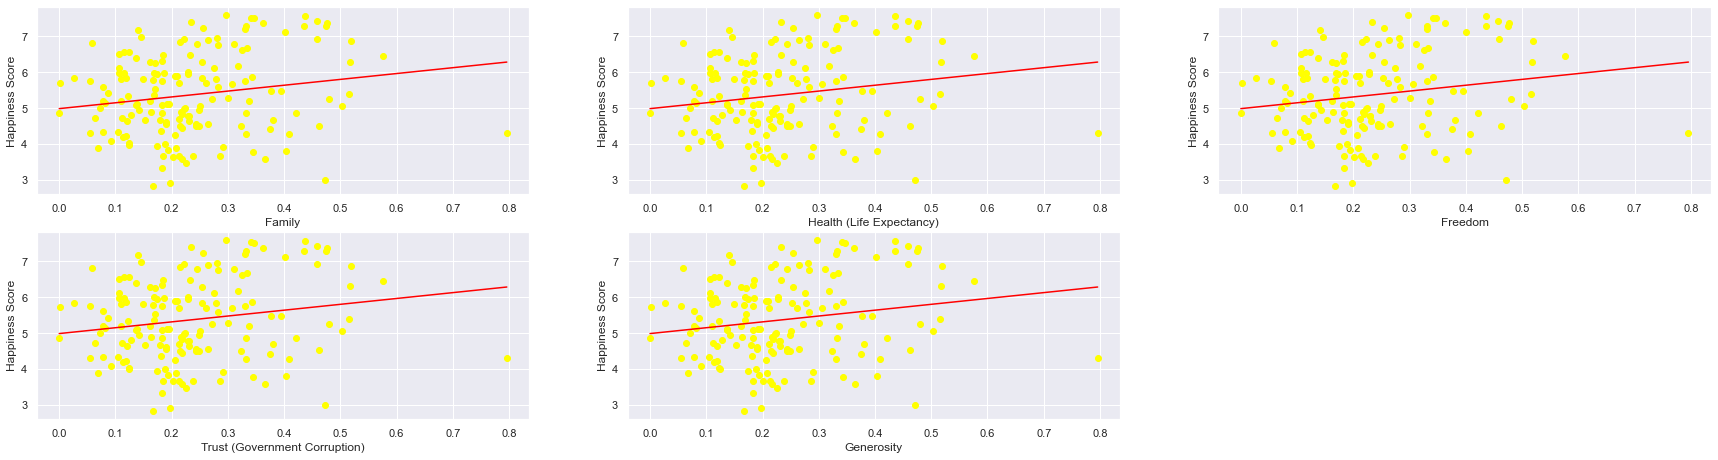

In [88]:
plt.figure(figsize=(30,20))
for i, columns in enumerate(df.columns[1:6]):
    plt.subplot(5, 3, i+1)
    x = df[col]
    y = df['Happiness Score']
    plt.scatter(x, y, color='yellow')

    #plt.plot(x, y, '.', color="forestgreen",)
    plt.xlabel(columns)
    plt.ylabel('Happiness Score')
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color="red") #here we use 1 because it is a linear regression

<AxesSubplot:>

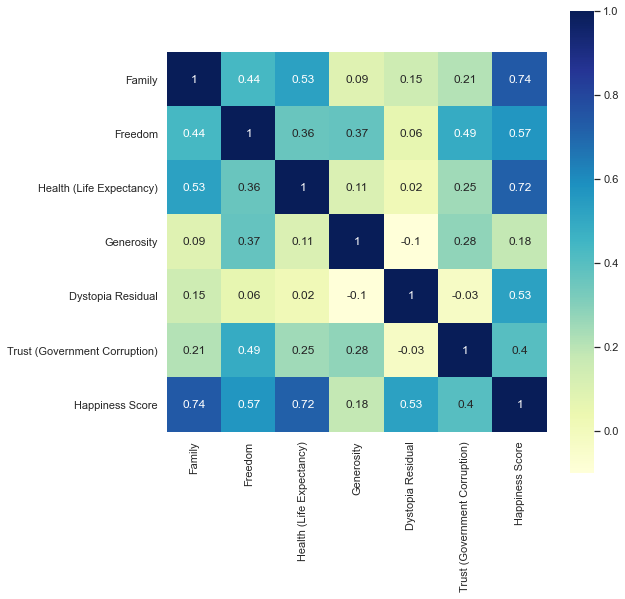

In [89]:
import seaborn as sns

features = df[['Family','Freedom','Health (Life Expectancy)','Generosity','Dystopia Residual','Trust (Government Corruption)','Happiness Score']]
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

In [90]:
X_train,X_test,Y_train,Y_test = train_test_split(df[['Family','Freedom','Health (Life Expectancy)','Generosity','Dystopia Residual','Trust (Government Corruption)']],df[["Happiness Score"]], test_size=0.2, random_state=0)

In [91]:
X_train.shape , X_test.shape

((126, 6), (32, 6))

In [92]:
from sklearn import linear_model

model= linear_model.LinearRegression().fit(X_train, Y_train)

In [93]:
pred_values=model.predict(X_test)

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [95]:
mean_squared_error(pred_values,Y_test)

0.04373835536650719

In [96]:
r2_score(pred_values,Y_test)

0.9549095704443024

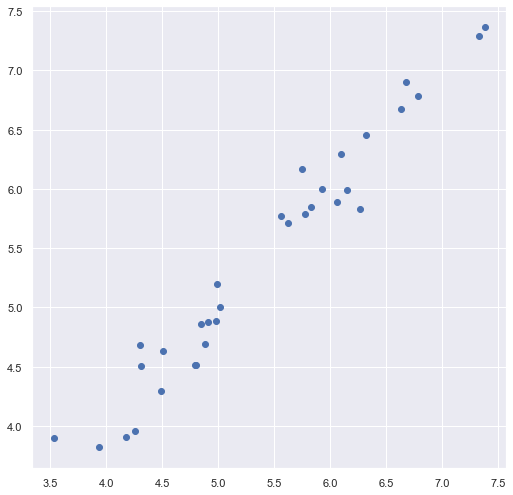

In [97]:
plt.scatter(pred_values,Y_test)